<h1 align="center">Extreme Drought Prediction in Yuma, Arizona</h1>

<h3 align="center">Final Project for Course Predicting Extreme Climate Behavior with Machine Learning (DSTA 5742)-Code</h3>

<h4 align="center">Wenwen Huang</h4>
<h4 align="center">April 2025</h4>

### Import libraries

In [4]:
# Importing core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import pprint


# Importing  libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Importing libraries for suport vector machine 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing libraries for random forest

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree

### Load data

In [6]:
# Reading final datset
# The data collection process was in a separate ipynb file (Data Collection.ipynb)
df = pd.read_parquet('yuma_final.parquet')

### EDA

In [8]:
# basic statistics summary
display(df.head())
display(df.info())

,date,PRCP,TMAX,TMIN,gwl,sm_5cm,st_5cm,sm_10cm,st_10cm,daily_discharge_cfs,D3
0,2015-01-13,0.0,72.0,49.0,158.53,0.091375,15.645833,0.065000,17.433333,18.0,0
1,2015-01-14,0.0,71.0,49.0,158.62,0.095750,14.670833,0.064250,16.545833,18.6,0
2,2015-01-15,0.0,74.0,51.0,158.72,0.097792,14.233333,0.063875,16.345833,19.0,0
3,2015-01-16,0.0,77.0,52.0,158.63,0.099042,14.658333,0.064042,16.441667,19.3,0
4,2015-01-17,0.0,77.0,50.0,158.62,0.098250,14.870833,0.064125,16.629167,18.5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3276 non-null   datetime64[ns]
 1   PRCP                 3276 non-null   float64       
 2   TMAX                 3276 non-null   float64       
 3   TMIN                 3276 non-null   float64       
 4   gwl                  3276 non-null   float64       
 5   sm_5cm               3276 non-null   float64       
 6   st_5cm               3276 non-null   float64       
 7   sm_10cm              3276 non-null   float64       
 8   st_10cm              3276 non-null   float64       
 9   daily_discharge_cfs  3276 non-null   float64       
 10  D3                   3276 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 281.7 KB


None

There are 3276 rows and 11 columns in the dataset
- PRCP : Precipitation
- TMAX: Mamximun temperature
- TMIN: Minumun temperature
- gwl: Ground water level
- sm_5cm: Soil moisture at 5cm below surface
- sm_10cm: Soil moisture at 10cm below surface
- st_5cm: Soil temperature at 5cm below surface
- st_10cm: Soil temperature at 10c below surface
- daily_discharge_cfs: the volume(cubic feet) of water(Main canal) that passes the given location within second, daily average.

In [10]:
# Check for missing values
print(df.isnull().sum())

date                   0
PRCP                   0
TMAX                   0
TMIN                   0
gwl                    0
sm_5cm                 0
st_5cm                 0
sm_10cm                0
st_10cm                0
daily_discharge_cfs    0
D3                     0
dtype: int64


- There is no missing values

In [12]:
display(df.describe())

,date,PRCP,TMAX,TMIN,gwl,sm_5cm,st_5cm,sm_10cm,st_10cm,daily_discharge_cfs,D3
count,3276,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,2020-03-14 10:02:38.241758208,0.006102,88.828144,63.596459,157.013779,0.071155,27.599035,0.079794,27.627673,22.410073,0.121490
min,2015-01-13 00:00:00,0.000000,53.000000,34.000000,155.320000,0.030042,7.404167,0.036125,9.945833,12.400000,0.000000
25%,2017-10-18 18:00:00,0.000000,75.000000,51.000000,155.920000,0.042875,18.168750,0.062281,18.867708,19.300000,0.000000
50%,2020-03-30 12:00:00,0.000000,89.000000,62.000000,157.405000,0.055854,27.620833,0.075938,27.297917,22.000000,0.000000
75%,2022-07-26 06:00:00,0.000000,103.000000,76.000000,158.020000,0.087979,36.962500,0.092677,36.136458,25.500000,0.000000
max,2024-12-31 00:00:00,1.670000,120.000000,92.000000,158.780000,0.282200,46.650000,0.217500,43.762500,37.300000,1.000000
std,NaN,0.055943,15.273209,14.105562,1.058829,0.039785,10.224751,0.025184,9.027354,4.002656,0.326745


- From the statistic describe above for each column, we can see that data are in very different scales. The average range from 0.006 to157.

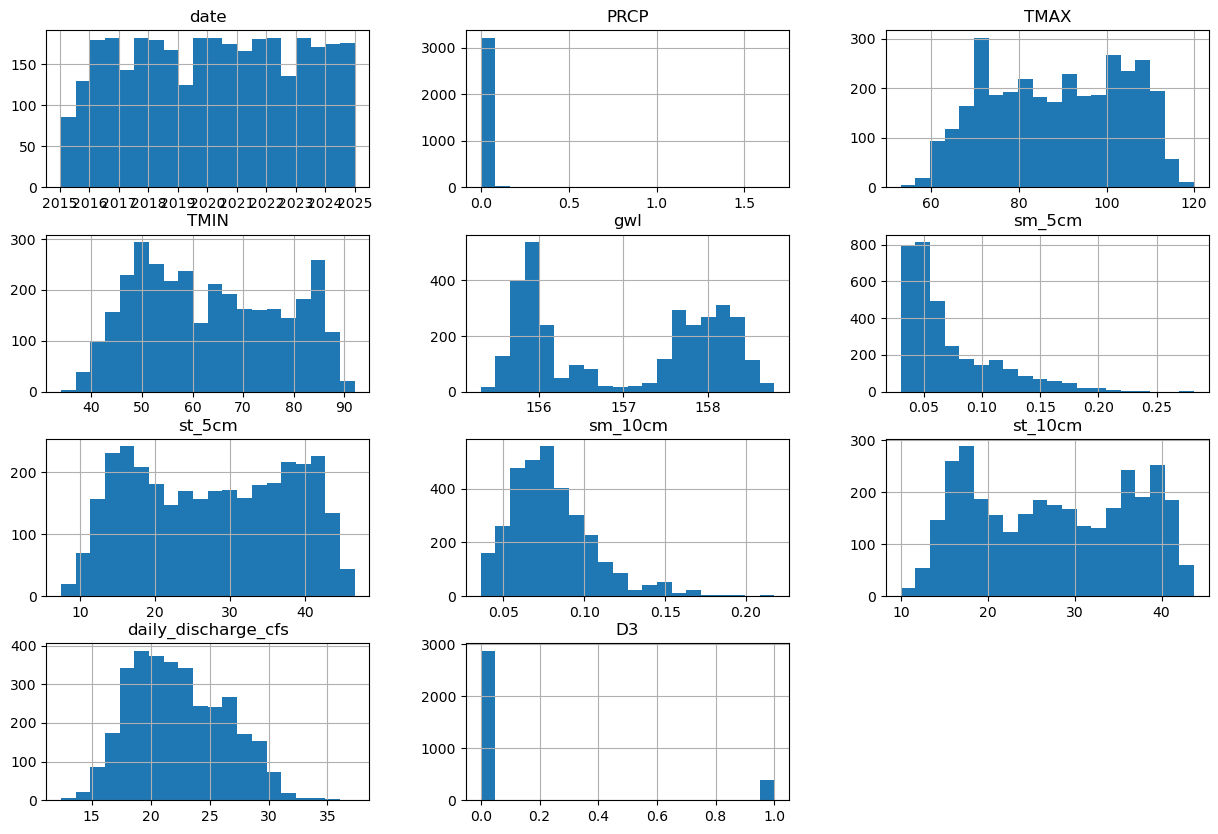

In [14]:
# Plot histograms for each feature to see distributions
df.hist(bins=20, figsize=(15, 10))
plt.savefig("Histogram", dpi=300, bbox_inches='tight')
plt.show()

From the histograms above we can see that:
- The precipitation is highly skewed to the right indicates that most days had little to no precipitation in the region.
- The Maxmium temperature and the minimum temperature have similar distributions except the max temperature is more bell-shaped than the minimum temperature.The maximum temperature is moderately spread between 55°F and 115°F.
- The groundwater level has two peaks indicates a Bimodal distribution, potenial caused by seasonal change.
- The soil moisture at 5cm and 10cm below ground have similar distribution which are both highly right-skewed indicate mostly dry periods with some wet periods.
- The soil temperature at 5cm and 10cm below ground have similar distribution which are farily uniform(spread between 10°C–45°C) with variations(the distribution at 10cm has more variations than it is at the 5cm).
- The daily discharge of the main canal has an approximate  normal distribution and centered around 20–25 cubic feet per second (cfs).
- The target class 'D3' represents extreme drought and most classes are "0", meaning no drought.

In [16]:
# select features for between featuers correlation
features = ['PRCP', 'TMAX', 'TMIN', 'gwl', 'daily_discharge_cfs','sm_5cm', 'sm_10cm','st_5cm','st_10cm']
target = 'D3'

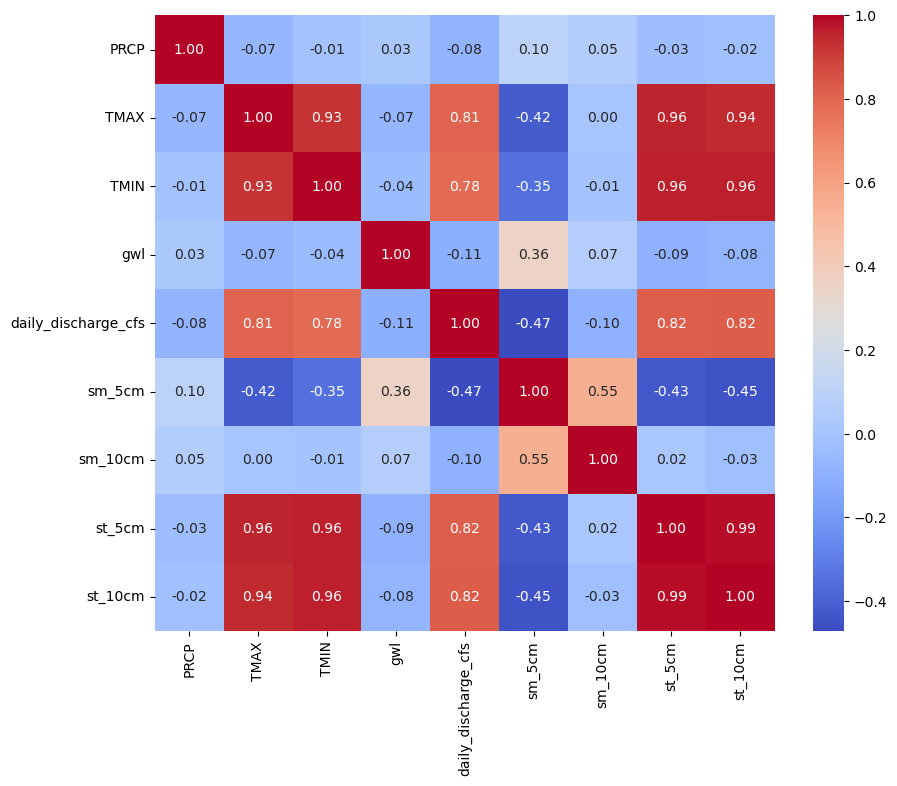

In [17]:
# Correlation matrix and heatmap between features

plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig("HeatMap", dpi=300, bbox_inches='tight')
plt.show()


From the heatmap above we can see that:

- Precipitation has almost no correlation (<0.1) with other features.
- Maximum temperature and Minimum temperature have very strong positive correlation (0.93). Both Maximum and Minimum temperature have very strong positive correlation with the soil temperatures (5cm and 10cm) which make sense as higher air temperatures cause higher soil temperatures.
- Daily discharge is strong positive correlated with both air temperatures(Max and Min) and soil temperatures (5cm and 10cm).
- Groundwater level and the soil moisture at 5cm below ground have moderate positive correlation (0.36).
- Soil temperatures at 5cm and 10 cm below ground have moderate positive correlation (0.55).

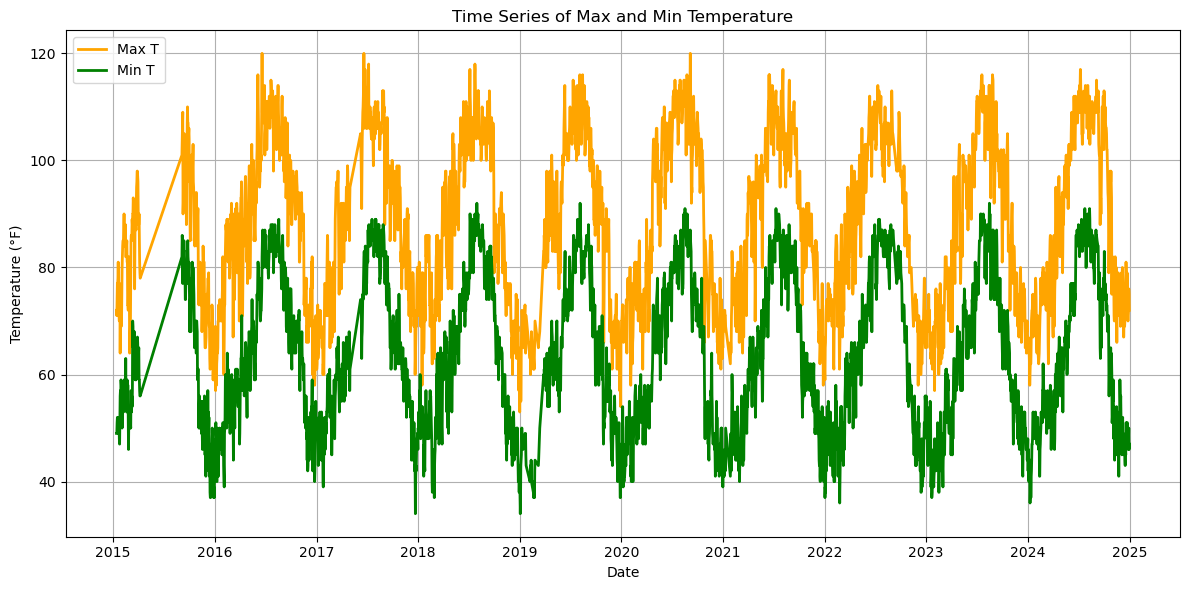

In [19]:
# take a look at the trend of maximun and minimun temperature in Yuma

# Sort by date
df = df.sort_values('date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['TMAX'], color='orange', linewidth=2,label='Max T')
plt.plot(df['date'],df['TMIN'],color='green',linewidth=2,label='Min T')
plt.title('Time Series of Max and Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("Yuma-Temperature-trend", dpi=300, bbox_inches='tight')
plt.show()

- From the plot above shows the daily high temperatures in oragne line and daily low temperatures in green line. Both lines show strong and regular seasonality as the peaks for summers and lows for winters. Max temperature ranges from 60°F to 120°F and Min temperature ranges from 35°F to 90°F. The Max and Min temperature gap looks consistent with 20-30°F difference daily. There are a lot of daily variations especially in Max temperature.

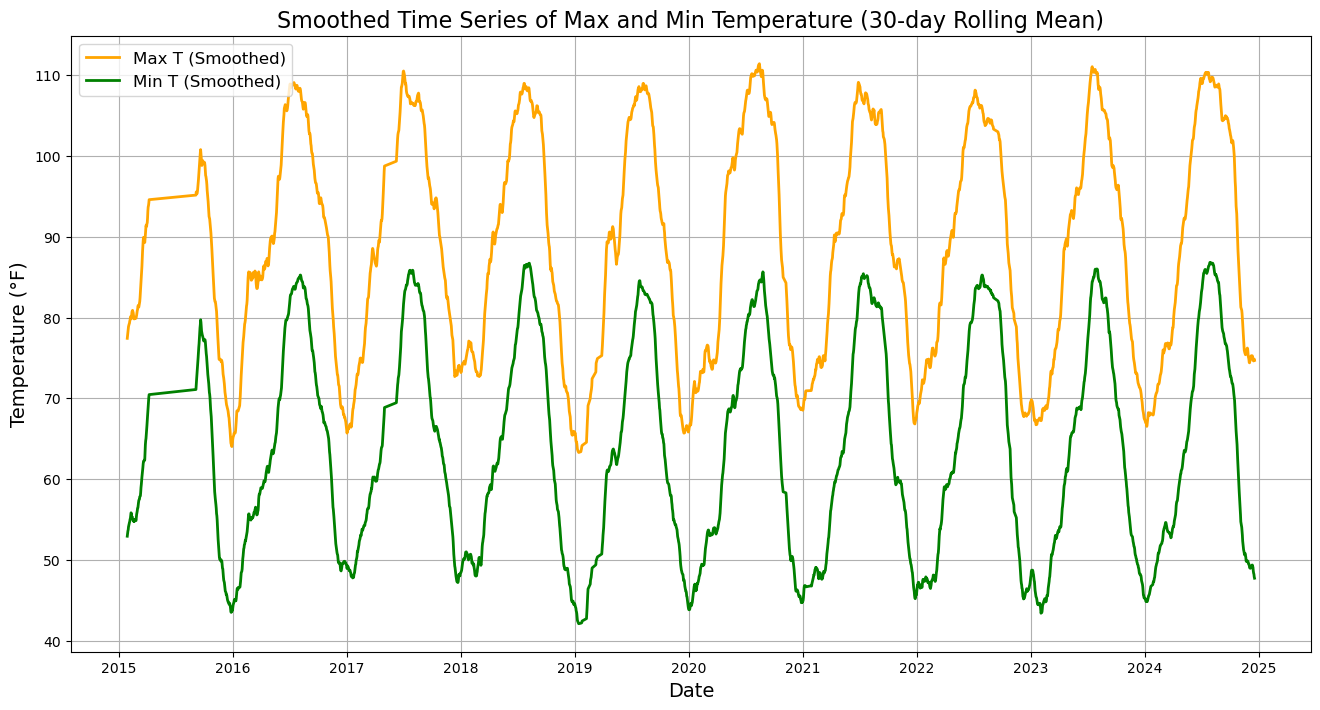

In [21]:
#  Smoothing trend of the temperature
# Rolling mean over 30 days (about a month)
tmax_smooth = df['TMAX'].rolling(window=30, center=True).mean()
tmin_smooth = df['TMIN'].rolling(window=30, center=True).mean()

# Plotting the smoothed data
plt.figure(figsize=(16, 8))
plt.plot(df['date'], tmax_smooth, color='orange', label='Max T (Smoothed)', linewidth=2)
plt.plot(df['date'], tmin_smooth, color='green', label='Min T (Smoothed)', linewidth=2)
plt.title('Smoothed Time Series of Max and Min Temperature (30-day Rolling Mean)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig("Yuma-Temperature-trend-smoothed", dpi=300, bbox_inches='tight')
plt.show()

- The smoothed trend is very consice with the original plot with less daily noises.

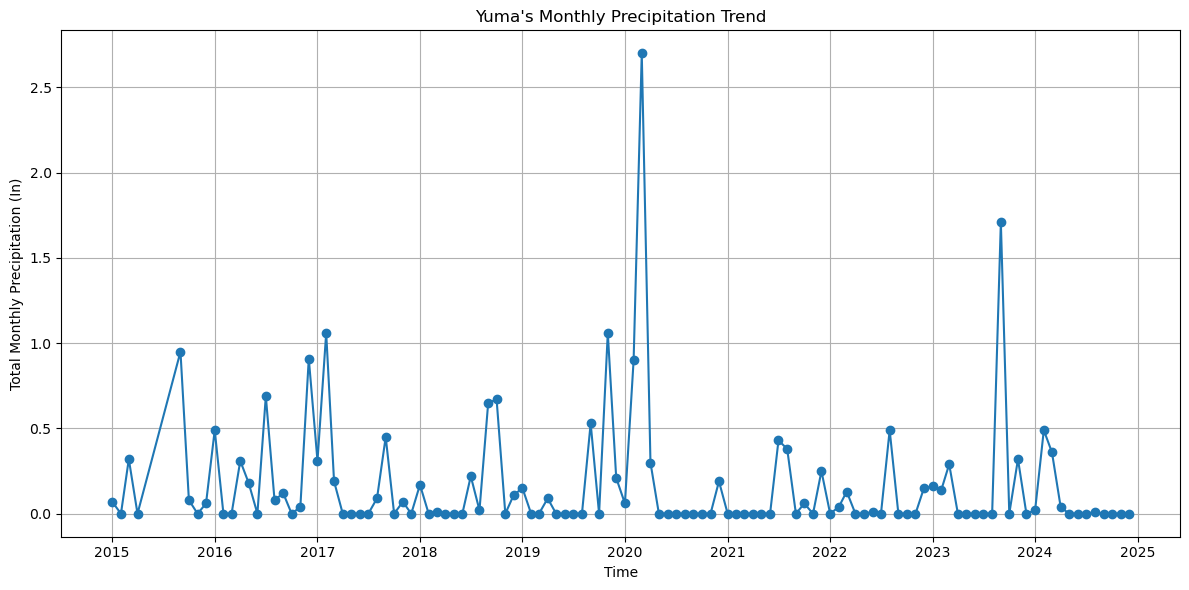

In [23]:
# take a look at the Yuma's percipitation trend
# Group by year and month, then sum precipitation
df['YearMonth'] = df['date'].dt.to_period('M')
monthly_precip = df.groupby('YearMonth')['PRCP'].sum().reset_index()

# Convert YearMonth back to timestamp
monthly_precip['YearMonth'] = monthly_precip['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_precip['YearMonth'], monthly_precip['PRCP'], marker='o', linestyle='-')
plt.title('Yuma\'s Monthly Precipitation Trend')
plt.xlabel('Time')
plt.ylabel('Total Monthly Precipitation (In)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Yuma-percipitation-level", dpi=300, bbox_inches='tight')
plt.show();

- Yuma's Monthly Precipitation Trend plot shows that many months experience very little or no rainfall. Additionally, the peaks during wetter months gradually decrease over time, indicating a long-term decline in overall precipitation.

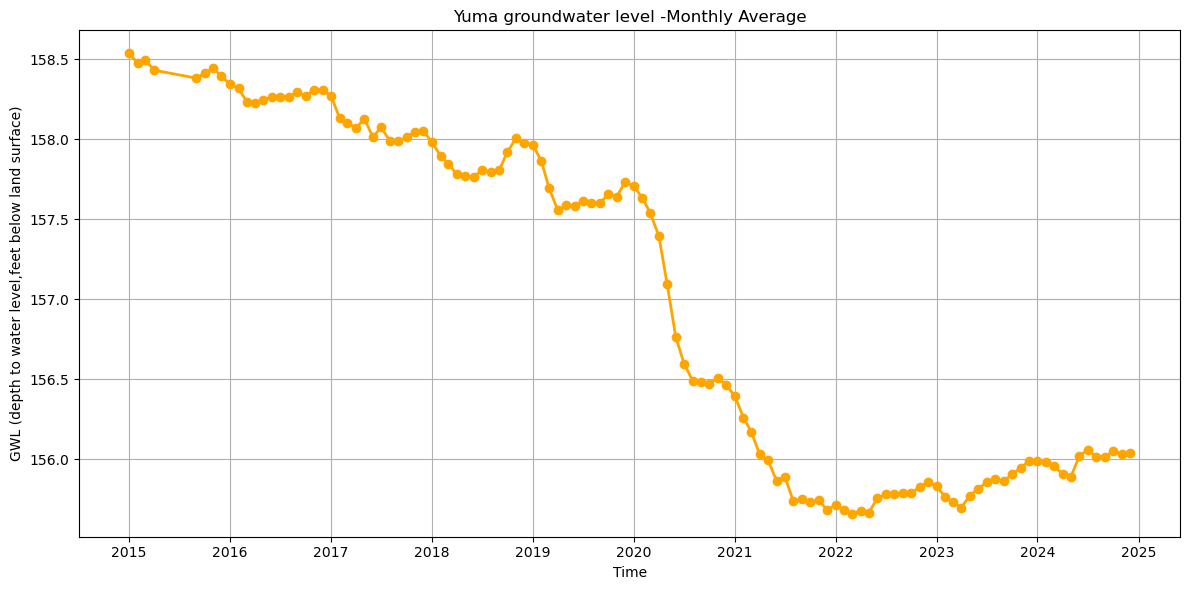

In [25]:
# take a look at the ground water level trend

monthly_gwl = df.groupby('YearMonth')['gwl'].mean().reset_index()

# Convert YearMonth back to timestamp
monthly_gwl['YearMonth'] = monthly_gwl['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_gwl['YearMonth'], monthly_gwl['gwl'], color='orange', marker='o', linestyle='-',linewidth=2)
plt.title('Yuma groundwater level -Monthly Average')
plt.xlabel('Time')
plt.ylabel('GWL (depth to water level,feet below land surface)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Yuma-groundwater-level-monthly", dpi=300, bbox_inches='tight')
plt.show();

- The data measured the depth to water level below land surface. There was a significant change (decrease) from year 2020 to 2022.

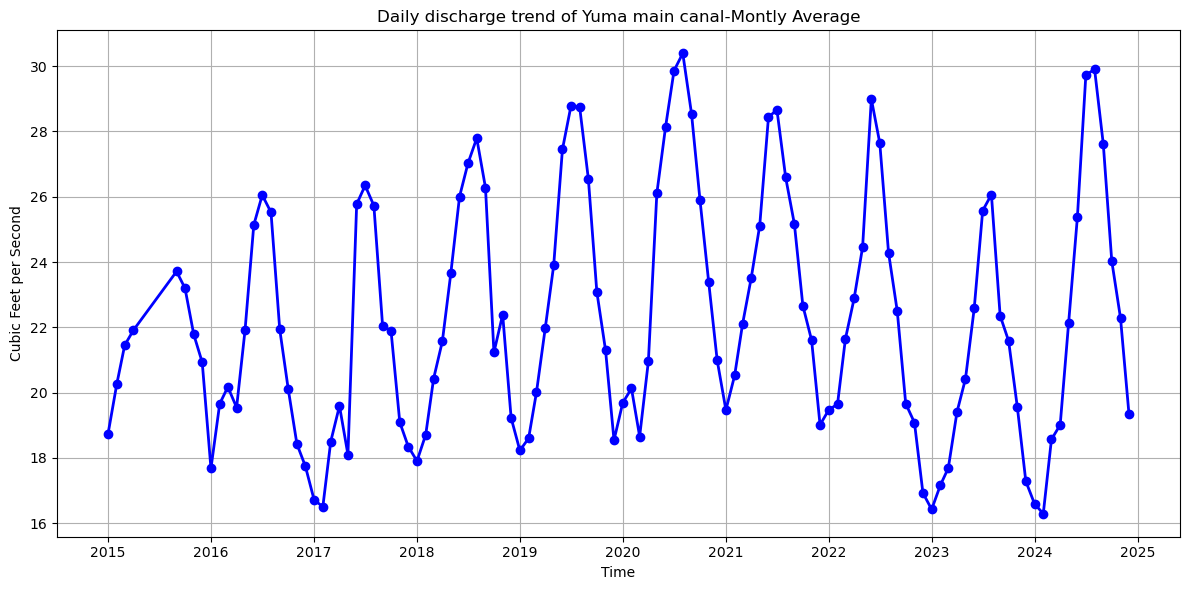

In [27]:
# take a look at the trend of Yuma main canal water discharge trend
monthly_discharge = df.groupby('YearMonth')['daily_discharge_cfs'].mean().reset_index()

# Convert YearMonth back to timestamp
monthly_discharge['YearMonth'] = monthly_discharge['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_discharge['YearMonth'], monthly_discharge['daily_discharge_cfs'], color='blue',marker='o', linewidth=2)
plt.title('Daily discharge trend of Yuma main canal-Montly Average')
plt.xlabel('Time')
plt.ylabel('Cubic Feet per Second')
plt.grid(True)
plt.tight_layout()
plt.savefig("yuma-canal-discharge-trend-monthly", dpi=300, bbox_inches='tight')
plt.show()

- The trend line shows strong and regular seasonality as the peaks for summer months and the lows for winter months.
- In general, the water demand from the main canal is increasing through time. The summer of 2020 had the most demand showing prosible drought condition.

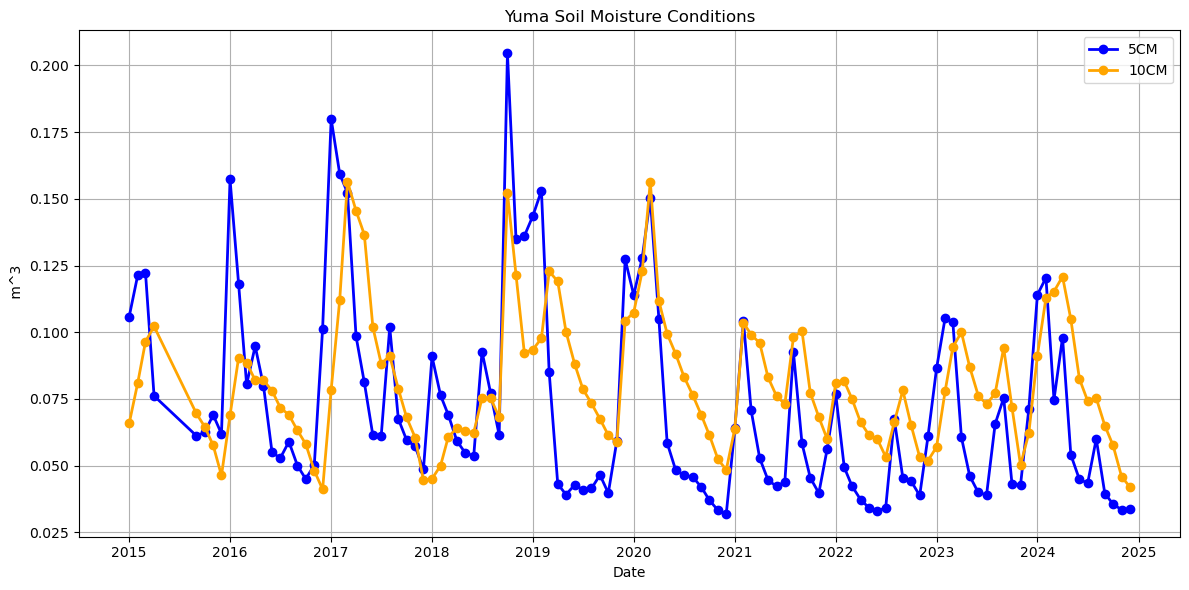

In [29]:
# take a look at the trend of Yuma soil conditions-Soil Moisture
monthly_sm_5 = df.groupby('YearMonth')['sm_5cm'].mean().reset_index()
monthly_sm_10 = df.groupby('YearMonth')['sm_10cm'].mean().reset_index()
# Convert YearMonth back to timestamp
monthly_sm_5['YearMonth'] = monthly_sm_5['YearMonth'].dt.to_timestamp()
monthly_sm_10['YearMonth'] = monthly_sm_10['YearMonth'].dt.to_timestamp()
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sm_5['YearMonth'], monthly_sm_5['sm_5cm'], color='blue', marker='o',linewidth=2,label="5CM")
plt.plot(monthly_sm_10['YearMonth'], monthly_sm_10['sm_10cm'], color='orange',marker='o', linewidth=2,label="10CM")
plt.title('Yuma Soil Moisture Conditions')
plt.xlabel('Date')
plt.ylabel(' m^3')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("yuma-soil-M-trend-monthly", dpi=300, bbox_inches='tight')
plt.show()

- The plot above displays monthly soil moisture trends at 5cm and 10cm below ground at Yuma region from 2015 to 2024.
- Soil moisture at 5cm depth (blue line) has more dramatic fluctuations compared to the 10cm depth(orange line) which make sense that the surface layers respond more quickly to to the rainfalla and dry out faster.The organe line (10cm depth) is slightly more stable than the blue line with less extreme peaks and lows.
- There are seasonal patterns in both lines indicates dryer and wetter seasons.
- The peaks become significant lower after 2019 suggests a decreasing trend in soil moisture levels at both depth.In general, both lines indicate a gradual drying trend over the decade.

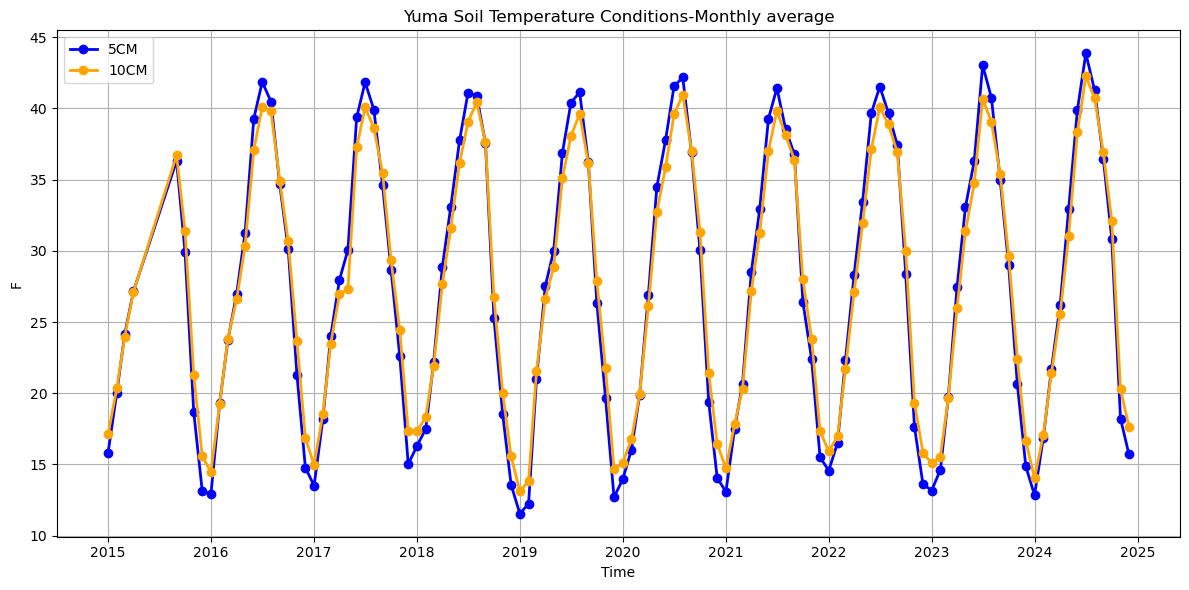

In [31]:
# take a look at the trend of Yuma soil conditions-soil temperature
monthly_st_5 = df.groupby('YearMonth')['st_5cm'].mean().reset_index()
monthly_st_10 = df.groupby('YearMonth')['st_10cm'].mean().reset_index()
# Convert YearMonth back to timestamp
monthly_st_5['YearMonth'] = monthly_st_5['YearMonth'].dt.to_timestamp()
monthly_st_10['YearMonth'] = monthly_st_10['YearMonth'].dt.to_timestamp()
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_st_5['YearMonth'], monthly_st_5['st_5cm'], color='blue', marker='o',linewidth=2,label="5CM")
plt.plot(monthly_st_5['YearMonth'], monthly_st_10['st_10cm'], color='orange', marker='o',linewidth=2,label="10CM")
plt.title('Yuma Soil Temperature Conditions-Monthly average')
plt.xlabel('Time')
plt.ylabel('F')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("yuma-soil-T-trend-monthly", dpi=300, bbox_inches='tight')
plt.show()

- The plot above shows the monthly average soil temperature trends at both 5cm and 10 cm depth from 2015 to 2024.
- Soil temperature at 5cm (blue line) is slightly more variable compared to the 10cm depth (organe line), espcially higher in the summer.The soil temperature at 10cm (orange line)shows a slightly slower response(warms up and cools down slower) to the atmospheric conditions than it is at 5cm depth.
- Both lines have peaks over 40 and lows below 15 in most years.
- The plot show no long-term trend in soil temperture over time as the repeating seaonal patterns fluctuate  consistently.

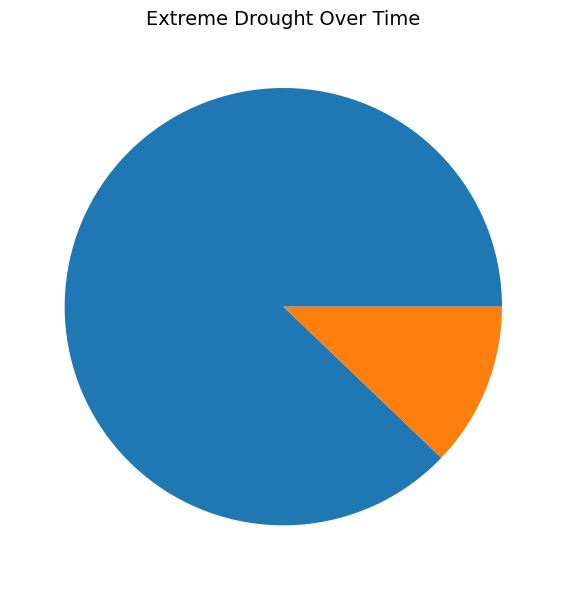

In [33]:
# take a look at the Extreme Drought situation over time in this region
plt.figure(figsize=(12, 6))
plt.pie(df['D3'].value_counts())
# Add title and labels
plt.title('Extreme Drought Over Time', fontsize=14)

plt.tight_layout()
plt.savefig("yuma-ExTDrought", dpi=300, bbox_inches='tight')
plt.show()

- Classes are inbalanced as there are way more not extreme drought than extreme drought in the dataset.

### Split data to training set and testing set

In [36]:
# split 80-20 
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2, random_state = 401)

In [37]:
print(f'The shape of the training data is : {X_train.shape}')
print(f'The shape of the testing data is : {X_test.shape}')
print(f'The shape of the training target is : {y_train.shape}')
print(f'The shape of the testing target is : {y_test.shape}')

The shape of the training data is : (2620, 9)
The shape of the testing data is : (656, 9)
The shape of the training target is : (2620,)
The shape of the testing target is : (656,)


In [38]:
print("Sample data from train set:")
print()
print(X_train.head())
print()
print("Sample data from train target:")
print()
print(y_train.head())

Sample data from train set:

      PRCP   TMAX  TMIN     gwl  daily_discharge_cfs    sm_5cm   sm_10cm  \
2840   0.0   99.0  69.0  155.92                 20.8  0.047167  0.074417   
999    0.0   82.0  49.0  157.90                 22.1  0.051875  0.059583   
1951   0.0   73.0  48.0  156.00                 22.1  0.080833  0.100250   
3069   0.0  103.0  71.0  155.93                 23.5  0.048167  0.096542   
2396   0.0   98.0  69.0  155.64                 25.6  0.034042  0.060833   

         st_5cm    st_10cm  
2840  31.208333  31.312500  
999   22.904167  24.508333  
1951  18.004167  17.379167  
3069  37.729167  35.054167  
2396  35.387500  33.529167  

Sample data from train target:

2840    0
999     1
1951    0
3069    0
2396    1
Name: D3, dtype: int64


### Model building 

#### Feature engineering-unsupervised technique

Using PCA(Principal Component Analysis) to reduce similar features like Soil Moisture and Soil Temperature then building a SVM(Support Vector Machine) model to perform extreme drgouth predction.

In [42]:
def pca_fun(pca_list,df,category,show_plot=True):
    # function to perform pca and plot the results
    # pca_list is a list of columns
    # df is a dataset
    # category is the name of the category type of data
    # function can plot the explained variance ratio with show_plot set to True
    # funcation can return the scaled data and the explained variaance ratio by components
    
    X = df[pca_list]
    X_scaled = StandardScaler().fit_transform(X)
    # Performing PCA with  components and plotting the explained variance
    n = len(pca_list)
    pca = PCA(n_components= n)
    principalComponents = pca.fit_transform(X_scaled)
    pc_columns = [f'principal component {i}' for i in range(1, n+1)]
    principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_columns)
    var_ratio = pca.explained_variance_ratio_
    # Plotting the explained variance as bar plot
    if show_plot:

        plt.figure(figsize=(10,5))
        plt.bar(range(1,n+1), pca.explained_variance_ratio_)
        plt.xlabel('Principal Component')
        plt.xticks(ticks=range(1,n+1), labels=pca_list)
        plt.ylabel('Explained Variance')
        plt.title(f'Explained Variance by Principal Component for {category}')
        plt.show()
    return var_ratio

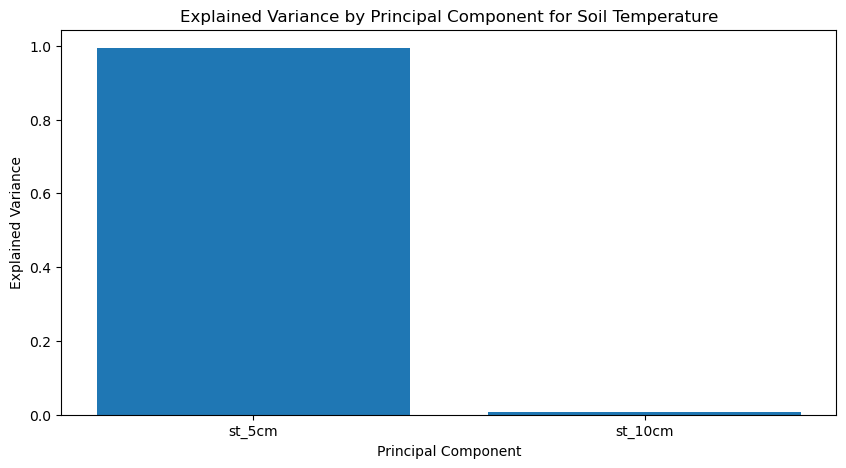

In [43]:
# perform PCA on Soil Temperature
st_pca_df=pca_fun(['st_5cm', 'st_10cm'],X_train,'Soil Temperature')

In [44]:
print(f'The Soil Temperature variacen ratio between st_5cm and st_10cm is {st_pca_df}')

The Soil Temperature variacen ratio between st_5cm and st_10cm is [0.99391149 0.00608851]


- Plot above and the components variacen ratio indicate that the first componet st_5cm explains the 99.39% of the important information (variance) and the second component st_10cm barely adds any new information.Therefore, st_5cm can be represented as the soil temperature component.

In [46]:
# update the training data
X_train.drop(['st_10cm'],axis=1,inplace=True)


In [47]:
# update the testing data
X_test.drop(['st_10cm'],axis=1,inplace=True)

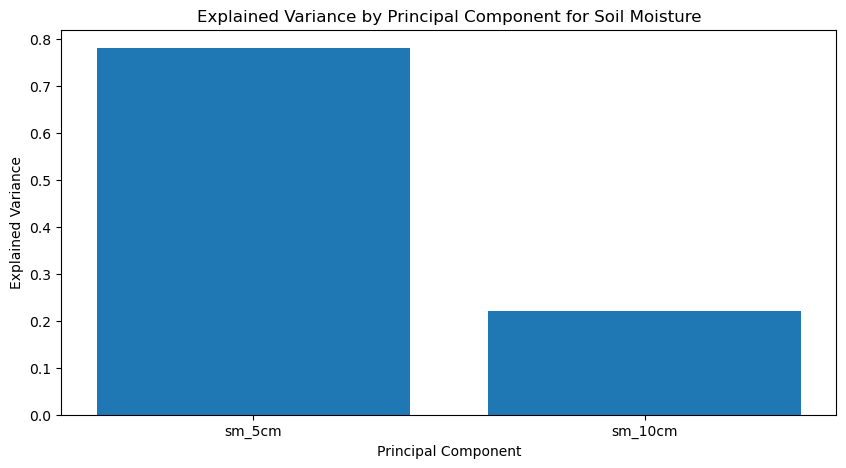

In [48]:
# perform PCA on Soil Moisture
sm_pca_df = pca_fun(['sm_5cm', 'sm_10cm'],X_train,'Soil Moisture');

In [49]:
print(f'The Soil Moisture variacen ratio between sm_5cm and sm_10cm is {sm_pca_df}')

The Soil Moisture variacen ratio between sm_5cm and sm_10cm is [0.77987023 0.22012977]


- Plot above and the components variacen ratio indicate that the first componet sm_5cm explains the 77.33% of the important information (variance) and the second component sm_10cm explains the 22.67% of the important information.As the ratio difference is not extreme like the soil temperature components, both components need to be kept due to domain knowledge.

#### Building a supervised Model using SVM

In [52]:
# SVM
# Create pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Grid for SVM parameters 
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 0.01, 0.1],
    'svm__kernel': ['rbf', 'linear']
}

# GridSearch with pipeline
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# Evaluate
print("Best parameters:", grid.best_params_)
print("Test Accuracy:", grid.score(X_test, y_test))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Test Accuracy: 0.9832317073170732


In [53]:
# choosing the best model perameters
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=10))])

In [54]:
# predict the test data
y_pred_svc = best_model.predict(X_test)

#### Model Testing

In [56]:
# model evaluation 
print(f"Accuracy:{accuracy_score(y_test, y_pred_svc):.03}" )
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


Accuracy:0.983
[[569   4]
 [  7  76]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       573
           1       0.95      0.92      0.93        83

    accuracy                           0.98       656
   macro avg       0.97      0.95      0.96       656
weighted avg       0.98      0.98      0.98       656



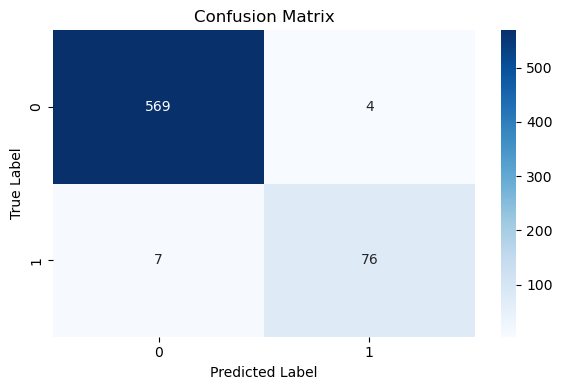

In [57]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('cf-svc')
plt.show()


- This SVM model achieved a high accuracy of 0.983, correctly predicting the class in most cases.
- There are 569 instances of class 0 and 76 instances of class 1 were correctly predicted, 4 were incorrectely classified as class 1 as it was class 0 and 7 were misclassified as class 0.
- The precision, F1-score and Precision for both classes were all high indicate the modle performs excellent for both classes even with the target class imbalance. The model performs slightly better on class 0 than class 1 (F1-score is higher for class 0).


### Build another supervised model

In [60]:
# grid search parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# random forest model
rf = RandomForestClassifier(random_state=401)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=401),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

#### Model Testing

In [62]:
# choose the best model parameters
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print()
print(f"Accuracy:{accuracy_score(y_test, y_pred_rf):.03}" )
print()
print(classification_report(y_test, y_pred_rf))


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Accuracy:0.988

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       573
           1       0.99      0.92      0.95        83

    accuracy                           0.99       656
   macro avg       0.99      0.96      0.97       656
weighted avg       0.99      0.99      0.99       656



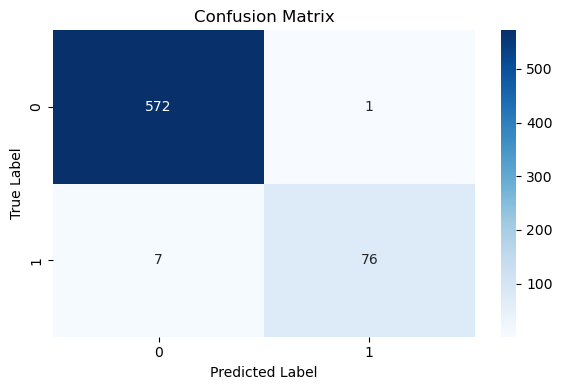

In [63]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("cf-rf")
plt.show();

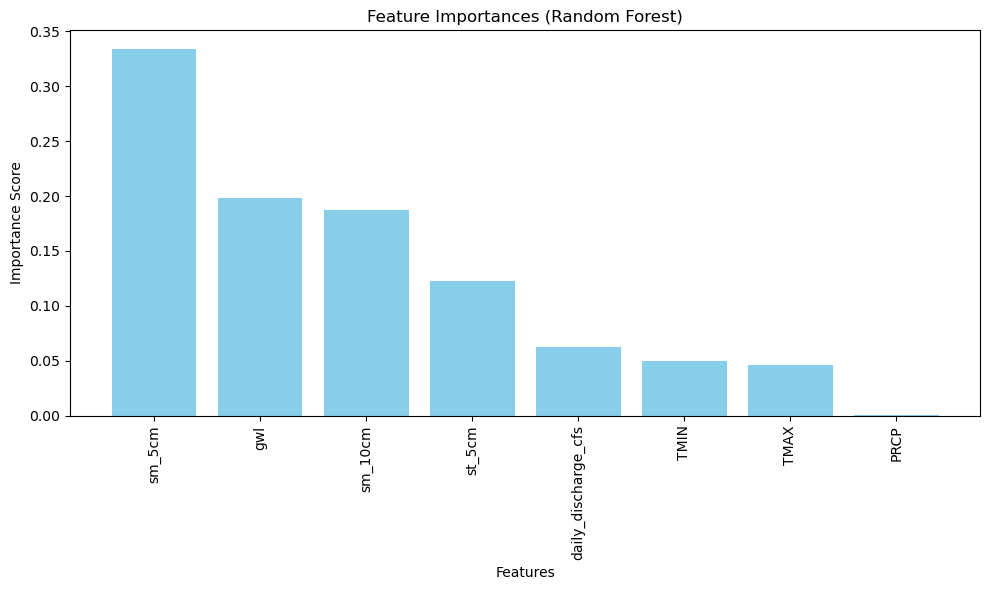

In [64]:
importances = best_rf.feature_importances_
feature_names = X_train.columns  

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.savefig('RF-feature-importance', dpi=300, bbox_inches='tight')
plt.show()

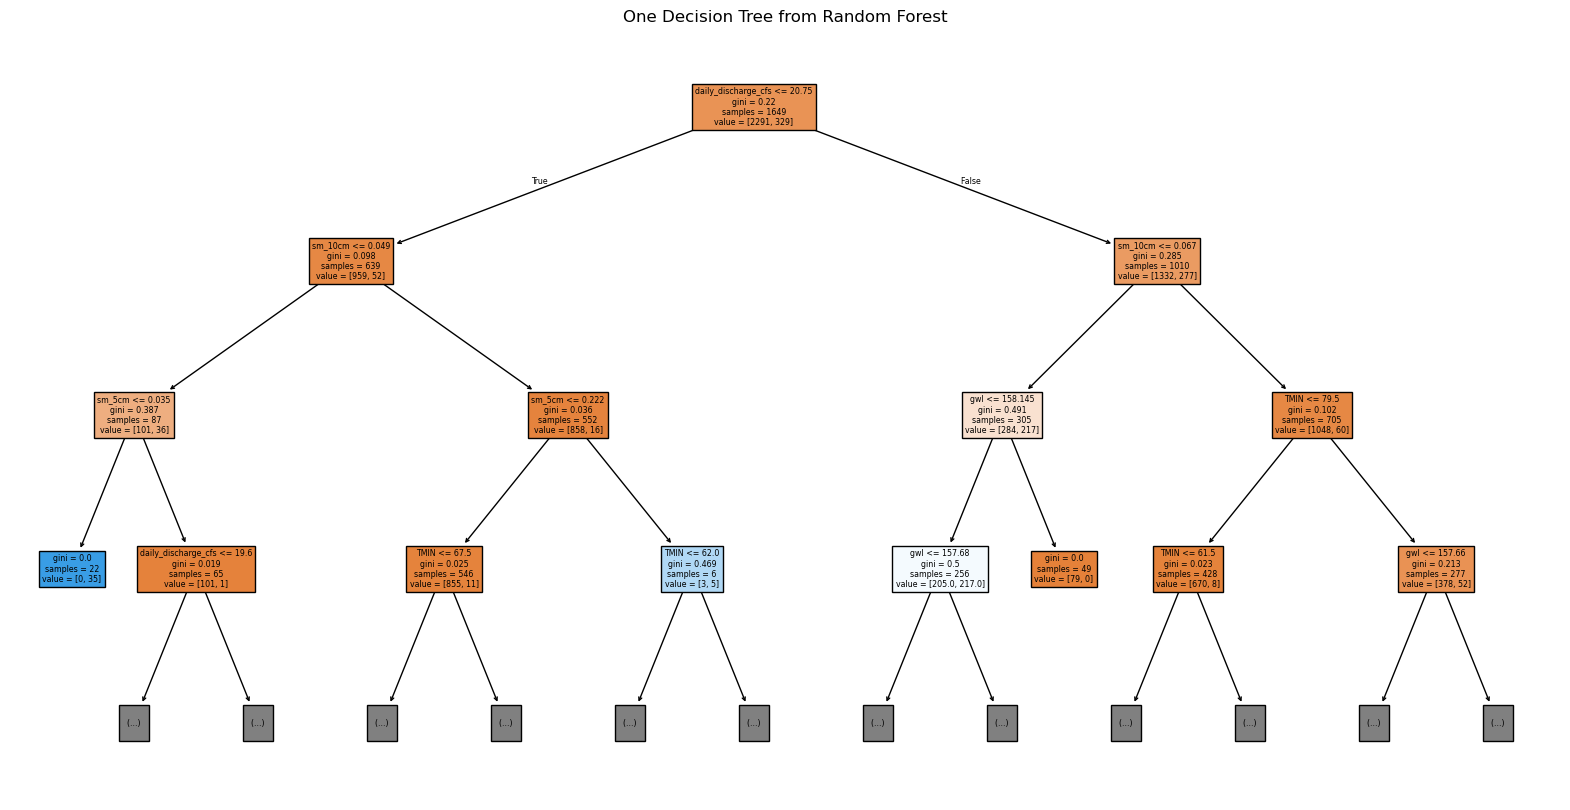

In [65]:
from sklearn.tree import plot_tree

# Pick one tree from the forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], 
          feature_names=X_train.columns, 
          filled=True, 
          max_depth=3)  # Limit depth to keep it readable
plt.title("One Decision Tree from Random Forest")
plt.savefig("One-tree", dpi=300, bbox_inches='tight')
plt.show()


- The model using 100 decision trees.
- This Random Forest model achieved a high accuracy of 0.99, correctly predicting the class in most cases. It preforms better than the supervised SVM model in general.
- There are 572 instances of class 0 and 76 instances of class 1 were correctly predicted, 1 were incorrectely classified as class 1 as it was class 0 and 7 were misclassified as class 0. Compairing with the SVM model, there were 3 less incorrect predictions.
- The precision, F1-score and Precision for both classes were all high indicate the modle performs excellent for both classes even with the target class imbalance. The model performs slightly better on class 0 than class 1 (F1-score is higher for class 0).
- The macro average F1-score is 0.97, and the weighted average is 0.99, showing that the model is highly effective overall, with only a slight dip in recall for the minority class (class 1).

### Results

In this project, a Support Vector Machine(SVM) and a Random Forest were built to predict extreme drought in Yuma,AZ region. 

The hyperparameters of both models were turned with GridSearchCV and achieved accuracies above 0.98, demonstrating strong predictive capabilities. The SVM model showed higher precision and recall for the majority class(class 0) than the minority class (class 1) indicating some challenges in correctly classifying all posotive cases.The Random Forest model has a slightly higher overall accuracy for both classes than the SVM model. It performed very well across both classes with high precisions and recalls and showed better balance in predicting both classes.

Both models performed well but the Random Forest slightly outperfomed SVM in overall accuracy and class balance. This suggests that the Random Forest model here has better ability to capturing complex realtionship in this data and benefiting from ensemble learning.

Overall, with the hgih performance of both models even with class imbalance and overlapping feature distribution in the dataset,we can result that machine learning can effectively predict extreme drought with processed environmental data. Based on the results of this project,
among the two models built, the Random Forst model is better for further study due to its slightly better accuracy and class balance, as well as robustness to overfitting.
